<a href="https://colab.research.google.com/github/aljoharas/IT326/blob/j/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv('https://raw.githubusercontent.com/aljoharas/IT326/refs/heads/main/Dataset/pollution%20dataset.csv')


# **Summary of Raw Data**
Raw data is unprocessed information gathered from different sources, that has not yet been analyzed or organized. It consists of original data points that often require cleaning and processing before they can provide valuable insights.

### **Displaying raw data**

In [ ]:
summary = df.describe()

print("Summary of the dataset:")
print(summary)

Summary of the dataset:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000              

In [ ]:
import matplotlib.pyplot as plt
air_quality_distribution = df['Air Quality'].value_counts()
print("Air Quality:\n", air_quality_distribution)

Air Quality:
 Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64


**Sampling**

### **Statistical Measures:**
Descriptive statistics for numeric values summarize key features of a dataset.


**Min:** The minimum value in the dataset.

**Q1 (25%):** The first quartile, representing the value below which 25% of the data fall.

**Median (50%):** The middle value when the data is sorted in ascending order.

**Q3 (75%):** The third quartile, representing the value below which 75% of the data fall.

**Max:** The maximum value in the dataset.

In [ ]:
statistical_measures = df.describe(percentiles=[.25, .5, .75]).transpose()

# To get min, Q1, median, Q3, max:
statistical_measures = statistical_measures[['min', '25%', '50%', '75%', 'max']]

statistical_measures.columns = ['Min', 'Q1', 'Median', 'Q3', 'Max']

# Display the results
print(statistical_measures)

                                  Min      Q1  Median       Q3     Max
Temperature                     13.40   25.10   29.00   34.000   58.60
Humidity                        36.00   58.30   69.80   80.300  128.10
PM2.5                            0.00    4.60   12.00   26.100  295.00
PM10                            -0.20   12.30   21.70   38.100  315.80
NO2                              7.40   20.10   25.30   31.900   64.90
SO2                             -6.20    5.10    8.00   13.725   44.90
CO                               0.65    1.03    1.41    1.840    3.72
Proximity_to_Industrial_Areas    2.50    5.40    7.90   11.100   25.80
Population_Density             188.00  381.00  494.00  600.000  957.00


The summary of statistical measures gave insights on key pollutants including PM2.5, with levels ranging from 0.00 to 295.00 µg/m³ and a median of 12.00 µg/m³, suggesting moderate air quality but with spikes in some areas. PM10 also exhibits a similar pattern with a range of -0.20 - 315.80 and a median of 21.70. , The presence of high PM2.5 and PM10 levels suggests areas with poor air quality.

Nitrogen dioxide (NO2) levels range from 7.40 to 64.90 µg/m³. In contrast, sulfur dioxide (SO2) Range -6.20 - 44.90, with a median of 8.00, and carbon monoxide (CO) Range 0.65 - 3.72, with a median of 1.41 levels are both relatively low, indicating minimal industrial activity and combustion-related pollution.

The temperature ranged from 13.40 to 58.60, with a median of 29.00. indicating temperature varies significantly, possibly from the different seasons or geographical locations. On the other hand, Humidity range was 36.00 - 128.10, with a median of 69.80. Humidity levels are relatively high.

The Population Density range 188.00 - 957.00, with a median of 494.00. meaning Population density varies significantly, indicating a mix of urban and rural areas. and the Proximity to Industrial Areas range was 2.50 - 25.80, with a median of 7.90. This measure suggests being closer to industrial areas is associated with higher levels of (PM2.5 and PM10) in the air.

### **Variables Distribution**
Variable distribution refers to the way the values of a specific variable are spread or organized within a dataset. It indicates the frequency or likelihood of different outcomes for that variable, helping to uncover patterns, trends, and potential anomalies.


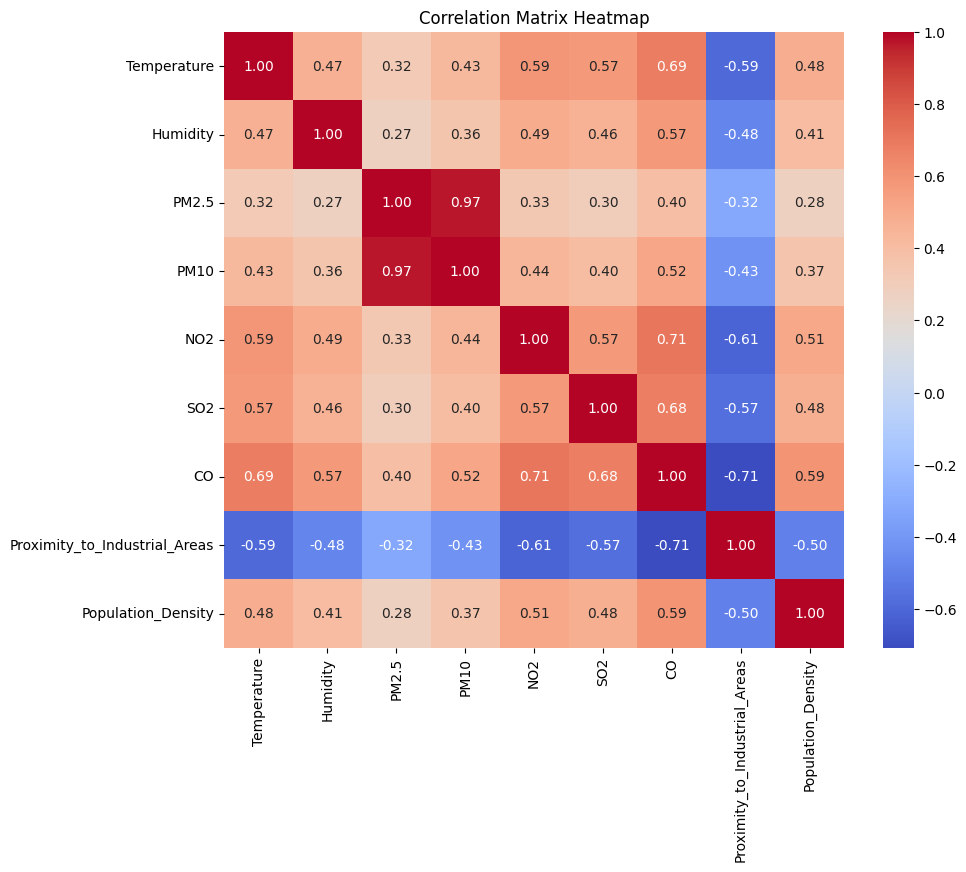

In [ ]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Positive Correlations:**

PM2.5 and PM10 are strongly related. If one increases, the other also increases. This is because they both come from similar pollution sources.

NO2 and CO may also have a strong connection since they both come from cars and factories.

**Negative Correlations:**

Temperature and pollution might have a negative Correlation. When the temperature is high, pollution spreads out more, but when it is low, pollution stays in the air.

Air quality and industrial areas/population density might be related. More factories and people can mean more pollution.

**Class Imbalance Detection**

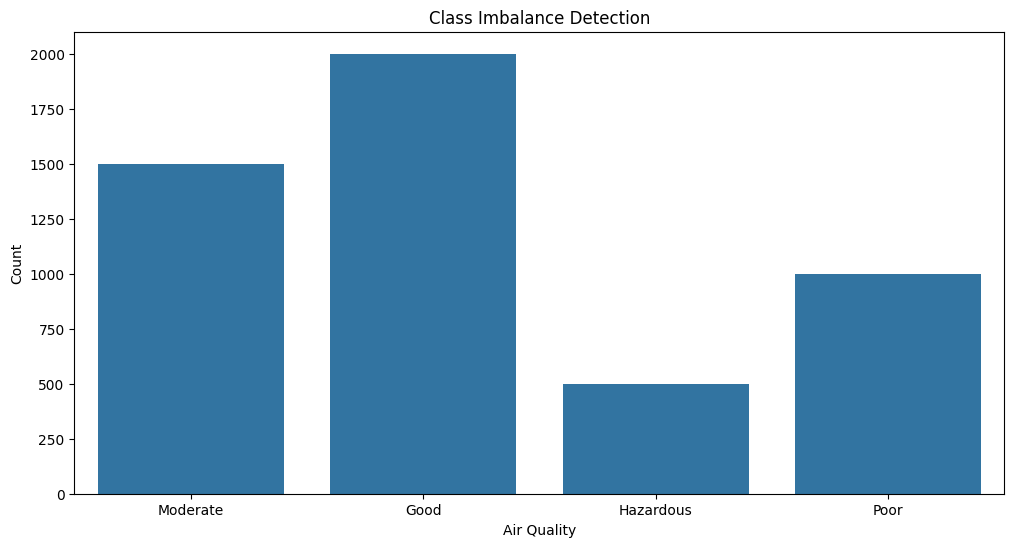

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Air Quality', data=df)
plt.title('Class Imbalance Detection')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.show()


"Good": 2000 samples (most common)

"Moderate": 1500 samples

"Poor": 1000 samples

"Hazardous": 500 samples (least common)


The dataset is imbalanced because the "Hazardous" class has much fewer samples (500) compared to "Good" (2000).

# **Data Preprocessing**
Before we proceed with data analysis, we need to clean the dataset to ensure accurate and reliable results.


### **Remove Noise**

Noisy data consists of errors, outliers, missing values, or inconsistencies that can affect the accuracy of our model. We will address this by:

- Removing unnecessary columns.

- Handling the missing values.

- Detecting and removing outliers.

### **Delete Unnecessary Columns**

Since no columns have been specifically identified as unnecessary, we will retain all columns for the time being.

### **Detect and Handle Missing Values**


In [ ]:
missing_values = df.isna().sum()

print('Missing values in each column:')
print(missing_values)

print('\nTotal number of missing values:', missing_values.sum())

Missing values in each column:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

Total number of missing values: 0


**Note:** The dataset doesn't have any missing values. But, just in case, we will replace any missing values with the mean of the corresponding columns.

In [ ]:
column_means = df.mean(numeric_only=True)
df.fillna(column_means, inplace=True)
print(df.fillna)

<bound method NDFrame.fillna of       Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0        0.249883 -0.776009 -0.709095 -0.357265 -0.943751  0.186610  1.007672   
1       -0.081730  0.617982 -0.930408 -0.746832  1.019982  0.301814  0.782907   
2       -1.231322  0.541946  0.931670  0.729421 -0.036143  0.969996  0.754811   
7        0.515174 -0.733767 -0.724358 -0.432445 -0.069147  1.200404  0.052421   
13      -0.015407 -1.232224  1.099563  0.743090 -0.234167 -0.896306 -0.959021   
...           ...       ...       ...       ...       ...       ...       ...   
4974     0.161453 -1.325157 -1.083037 -1.033881  0.095872 -0.435491 -1.071404   
4977    -0.789171 -0.091686  0.137998 -0.138561 -0.778731 -0.182042 -1.492838   
4985    -0.413343  0.356081 -0.922776 -0.705825  0.293896  1.108241  0.052421   
4991     0.692034  1.006610  0.603517  0.749925  0.838460 -0.804143 -0.397109   
4992     0.249883 -0.978771 -0.586992 -0.623811 -0.267171 -0.896306 -0.734256

### **Detect and Remove Outliers**
We will use the Z-Score Method to identify and remove extreme outliers in our numerical data.
(Z-Score is a statistical measure that shows how many standard deviations a data point is away from the mean).

In [ ]:
import numpy as np
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

threshold = 1.5

df = df[(np.abs(zscore(df[numeric_cols])) < threshold).all(axis=1)]
print("Data after removing outliers:")
print(df)
df = df.dropna(subset=['Air Quality'])


Data after removing outliers:
      Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7  33.8  24.4  12.6  1.63   
4            26.5      70.7    6.9  16.0  21.9   5.6  1.01   
7            31.0      59.6    5.0  16.8  24.2  13.6  1.38   
...           ...       ...    ...   ...   ...   ...   ...   
4985         26.8      72.5    2.4  12.8  26.4  13.2  1.38   
4991         31.8      80.2   22.4  34.1  29.7   4.9  1.22   
4992         29.8      56.7    6.8  14.0  23.0   4.5  1.10   
4993         34.9      77.7   32.3  47.1  17.4  11.5  1.63   
4997         25.9      78.2   14.2  22.1  34.8   7.8  1.63   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2              

# **Data Transformation:**
**Encoding:**

To help algorithms in processing the data, the "Air Quality" column is encoded as follows:


*   0 = Hazardous
*   1 = Poor
*   2 = Moderate
*   3 = Good



In [ ]:
le = LabelEncoder()
df['Air Quality']=le.fit_transform(df['Air Quality'])
print('Encoded Data:\n')
print(df)

Encoded Data:

      Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7  33.8  24.4  12.6  1.63   
4            26.5      70.7    6.9  16.0  21.9   5.6  1.01   
7            31.0      59.6    5.0  16.8  24.2  13.6  1.38   
...           ...       ...    ...   ...   ...   ...   ...   
4985         26.8      72.5    2.4  12.8  26.4  13.2  1.38   
4991         31.8      80.2   22.4  34.1  29.7   4.9  1.22   
4992         29.8      56.7    6.8  14.0  23.0   4.5  1.10   
4993         34.9      77.7   32.3  47.1  17.4  11.5  1.63   
4997         25.9      78.2   14.2  22.1  34.8   7.8  1.63   

      Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                               6.3                 319            2  
1                               6.0                 611            2  
2                          

**Normalization:**

Using Z-score normalization, all the columns (excluding "Air Quality") are normalized to unify the scales. This ensures that all columns have equal weight during processing which helps in identifying patterns and relationships more effectively.

In [ ]:
# Extract columns to normalize
cols_to_normalize = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
data_to_normalize = df[cols_to_normalize]

# Z-score Normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_normalize)

# Replace
df[cols_to_normalize] = normalized_data

print('Z-score Normalized Data:\n')
print(df)

Z-score Normalized Data:

      Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0        0.249883 -0.776009 -0.709095 -0.357265 -0.943751  0.186610  1.007672   
1       -0.081730  0.617982 -0.930408 -0.746832  1.019982  0.301814  0.782907   
2       -1.231322  0.541946  0.931670  0.729421 -0.036143  0.969996  0.754811   
4       -0.479665  0.204009 -0.579360 -0.487121 -0.448692 -0.642858 -0.987117   
7        0.515174 -0.733767 -0.724358 -0.432445 -0.069147  1.200404  0.052421   
...           ...       ...       ...       ...       ...       ...       ...   
4985    -0.413343  0.356081 -0.922776 -0.705825  0.293896  1.108241  0.052421   
4991     0.692034  1.006610  0.603517  0.749925  0.838460 -0.804143 -0.397109   
4992     0.249883 -0.978771 -0.586992 -0.623811 -0.267171 -0.896306 -0.734256   
4993     1.377368  0.795399  1.359033  1.638411 -1.191280  0.716548  0.754811   
4997    -0.612311  0.837641 -0.022263 -0.070216  1.680060 -0.135961  0.754811   

 

**Discretization:**


# **Feature selection**



Embedded methods were chosen for feature selection in this air quality dataset because they provide a good balance between accuracy and efficiency. Many features, like PM2.5, PM10, NO2, and SO2, are likely correlated, making it important to remove redundancy. These methods automatically filter out less important features, improving model performance while keeping it easy to interpret. Since air quality depends on multiple interconnected factors, embedded methods help select the most relevant features while ensuring they contribute effectively to model accuracy. This makes them a more reliable choice than filter methods.


In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd
data=df
df=pd.DataFrame(data)

x= df.drop(columns=['Air Quality'])
y= df['Air Quality']
y = y.map({'Good': 3, 'Moderate': 2, 'Poor': 1, 'Hazardous': 0})

model=Lasso(alpha=0.1, max_iter=100000)
model.fit(x,y)
selected_features=x.columns[model.coef_!=0]

print("Selected Features for L1 Regularization:", selected_features)

Selected Features for L1 Regularization: Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2',
       'Proximity_to_Industrial_Areas', 'Population_Density'],
      dtype='object')


# **Preprocessed Data**
Once the preprocessing techniques have been applied, we will save the changes.

In [ ]:
df.to_csv('preprocessed_data.csv')


# Data Representation

Visualizing data through graphs helps us understand patterns in datasets. For analysis we used pie chart, scatter plot, bar chart, and box plot.

The following pie chart help shows the proportion of locations in different air quality categories, which helps in understanding how air quality is distributed.


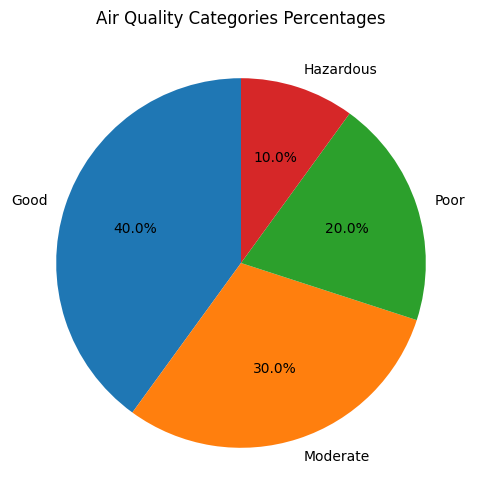

In [2]:
#for counting occurences of each air quality category
airquality=df['Air Quality'].value_counts()

airquality.plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title("Air Quality Categories Percentages")
plt.ylabel('')
plt.show()

The above pie chart tells us that around 40% of locations have Good air quality making it the most common air quality category
-Moderate air quality is the second most prevalent following at 30%
-Poor is third with only 20% of locations having poor quality
-Hazardous is 10% making it the least common.

In [ ]:
The following scatter plot analyzes NO2 in relation to PM2.5, Temperature, Humidity, Population Density

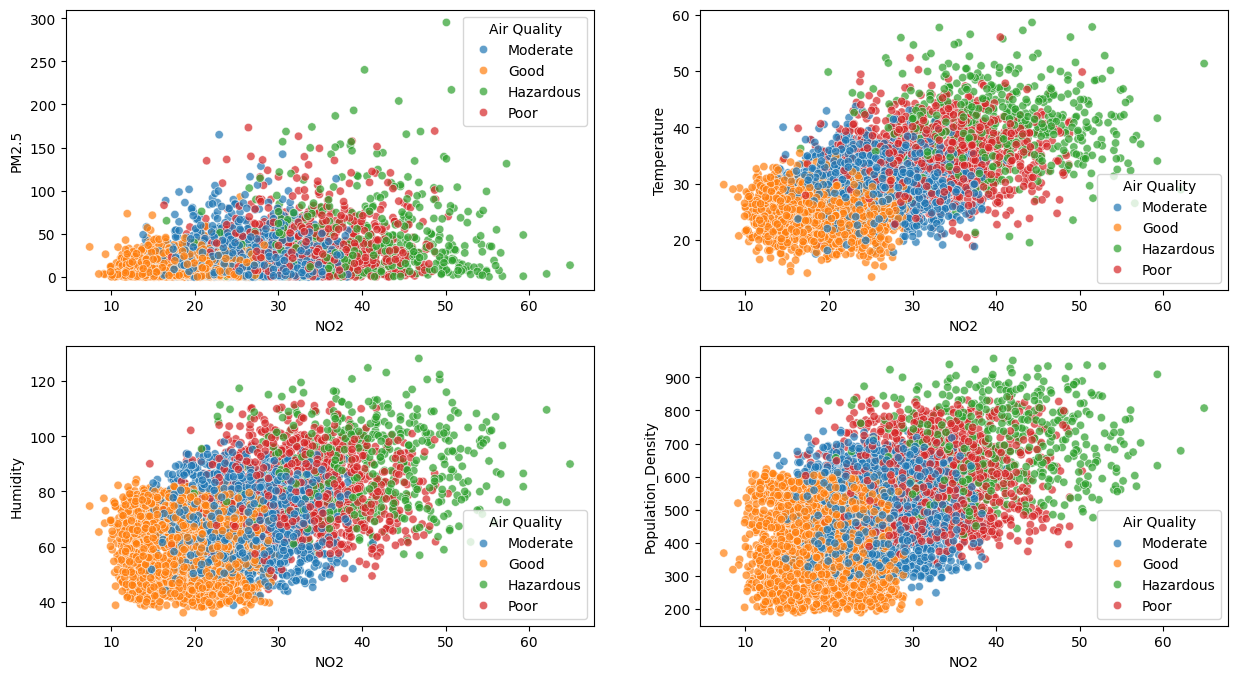

In [6]:
# creating the grid of the subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
# making the scatterplots for NO2 vs the other num values
sns.scatterplot(data=df, x='NO2', y='PM2.5', ax=axes[0][0], hue='Air Quality', alpha=0.7)
sns.scatterplot(data=df, x='NO2', y='Temperature', ax=axes[0][1], hue='Air Quality', alpha=0.7)
sns.scatterplot(data=df, x='NO2', y='Humidity', ax=axes[1][0], hue='Air Quality', alpha=0.7)
sns.scatterplot(data=df, x='NO2', y='Population_Density', ax=axes[1][1], hue='Air Quality', alpha=0.7)

plt.show()

1) The first scatterplot shows that higher NO₂ levels are associated with higher PM2.5 levels. This suggests that both polllutants may come from the same sources
2) The second scatterplot shows us that temperature and NO2 don't seem to have a strong relationship. Poor and hazardous air quality areas seem to exist in diverse temperature ranges which indicates that other factors may play a larger role than temperature
3) The third scatterplot also shows that there doesn't seem to be a strong relationship between humidity and NO2 since hazardous and poor air categories exist in different humidity ranges.
4) The fourth and last scatterplot shows us that there seems to be a moderate relation between NO2 and population density, with poor and hazardous air quality being more prevalent in populated areas

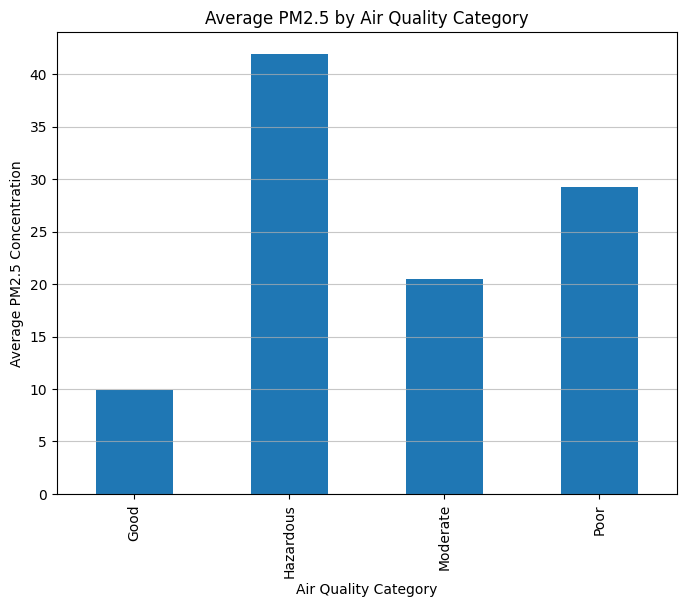

In [7]:
#to calculate the PM2.5 mean for each air quality group
pm25_by_air_quality = df.groupby('Air Quality')['PM2.5'].mean()
plt.figure(figsize=(8, 6))
pm25_by_air_quality.plot(kind='bar')
plt.xlabel("Air Quality Category")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Average PM2.5 by Air Quality Category")
plt.grid(axis='y', alpha=0.7)
plt.show()



The above bar chart shows that when PM2.5 increases, air quality becomes worse. Good air quality has the lowest average amount of PM2.5 and Hazardous has the highest average of PM2.5



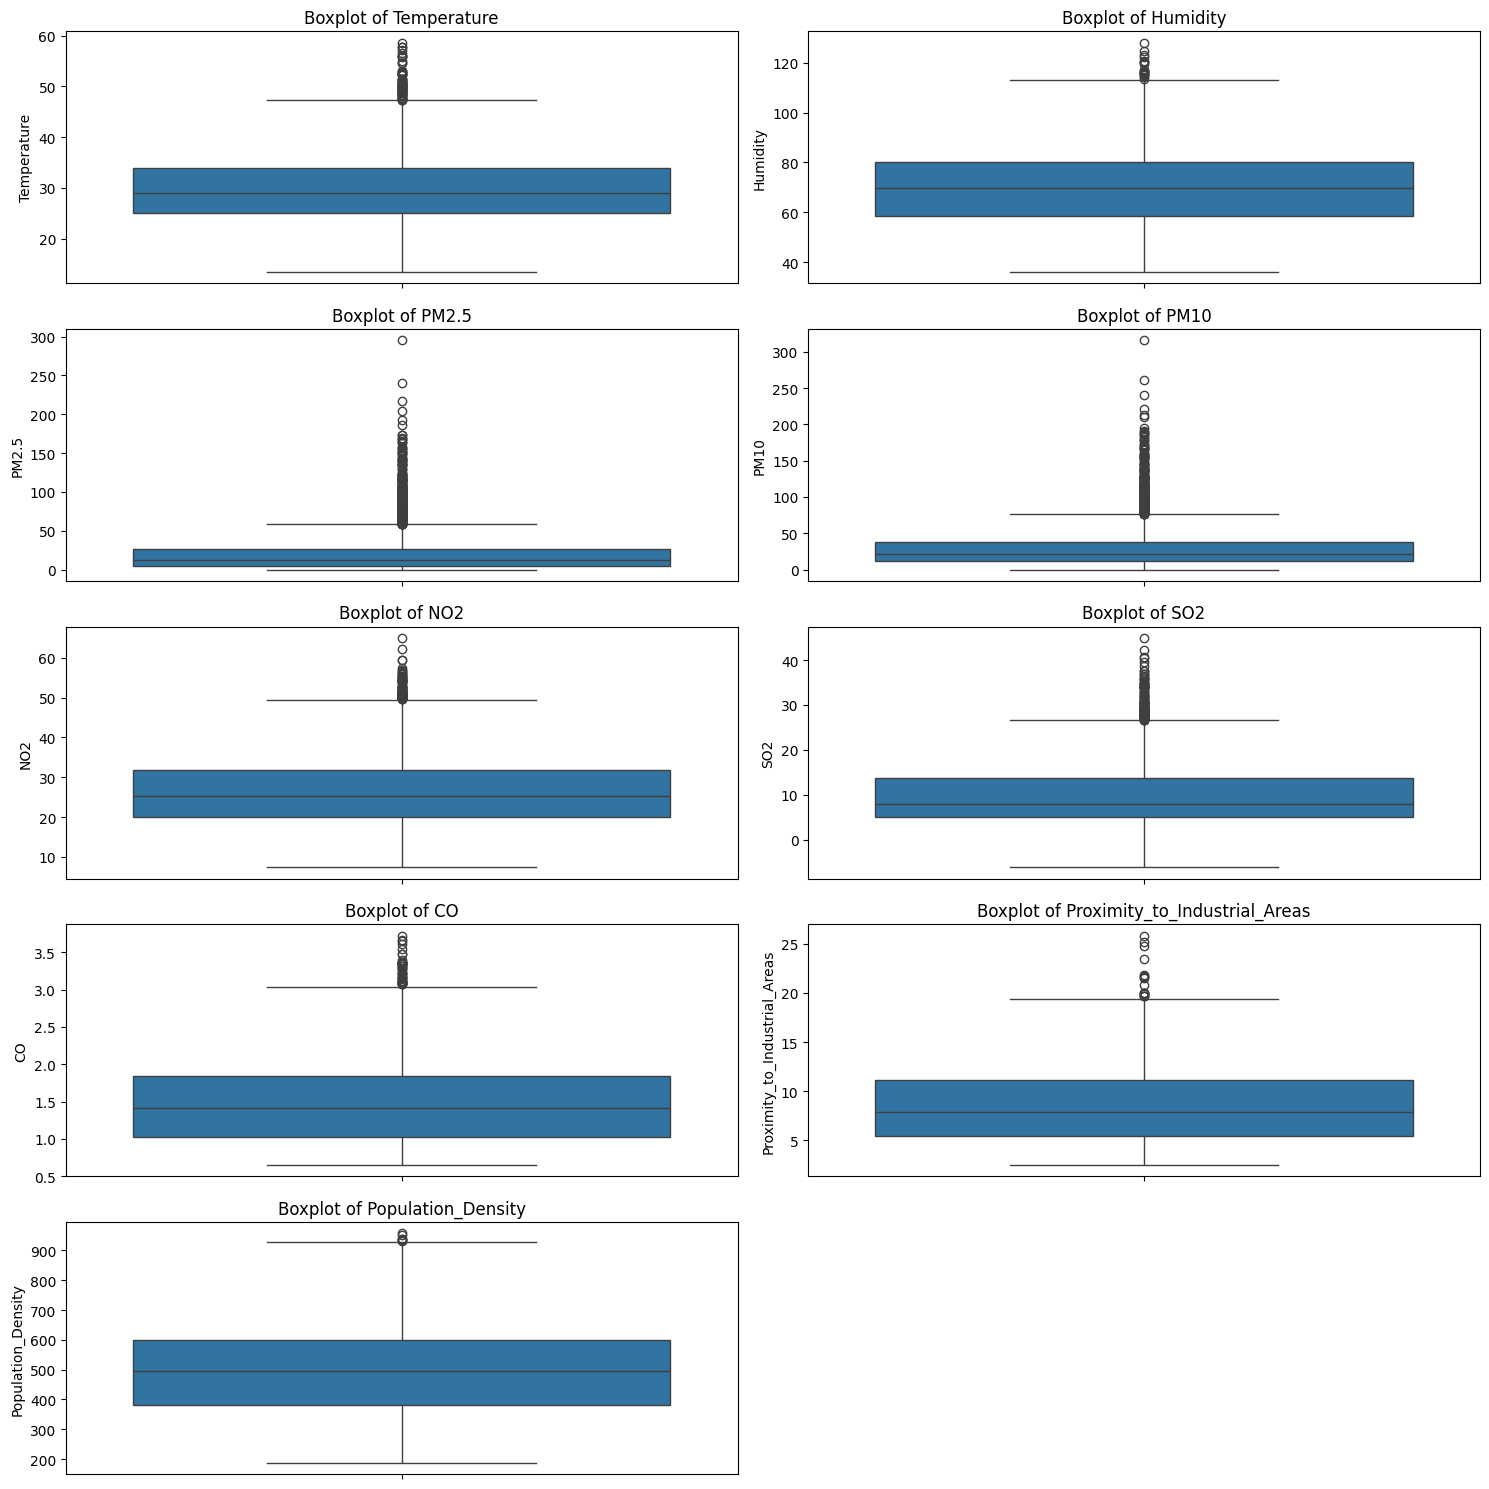

In [5]:
#to choose only numerical columns
int_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 15))
#looping through columns to create boxplot
for i, col in enumerate(int_cols, 1):
    plt.subplot((len(int_cols) + 1) // 2, 2, i)
    plt.title(f"Boxplot of {col}")
    sns.boxplot(y=df[col])
    plt.tight_layout()
    plt.show()

Boxplot of PM10:
